<a href="https://colab.research.google.com/github/Oluwajuwon-O/sentiment_analysis/blob/main/getting_started.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame(reviews, columns=['reviews'])
df.head()

,reviews
0,✅ Trip Verified | We booked premium economy r...
1,✅ Trip Verified | We chose Rotterdam and Lond...
2,✅ Trip Verified | The entire booking and ticke...
3,Not Verified | British Airways cancelled my ...
4,Not Verified | I wanted to write this review s...


In [4]:
df.to_csv("BA_reviews.csv", index=False)

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
reviews = pd.read_csv('BA_reviews.csv')
reviews.head()

,reviews
0,✅ Trip Verified | We booked premium economy r...
1,✅ Trip Verified | We chose Rotterdam and Lond...
2,✅ Trip Verified | The entire booking and ticke...
3,Not Verified | British Airways cancelled my ...
4,Not Verified | I wanted to write this review s...


In [6]:
reviews_df = reviews.copy()

reviews_df

,reviews
0,✅ Trip Verified | We booked premium economy r...
1,✅ Trip Verified | We chose Rotterdam and Lond...
2,✅ Trip Verified | The entire booking and ticke...
3,Not Verified | British Airways cancelled my ...
4,Not Verified | I wanted to write this review s...
...,...
995,✅ Trip Verified | Dublin to London Heathrow. ...
996,✅ Trip Verified | London to Seattle. My seat ...
997,✅ Trip Verified | London to Gibraltar. Check ...
998,✅ Trip Verified | London to Boston. BA replac...



* ✅ is pointless
* leading spaces
* | is not supposed to be there
* trip verification can be in separate column
* \r\n in some entries

* remove ✅
* split by |
* remove leading spaces
* remove \r\n

In [7]:
reviews_df = pd.DataFrame(reviews_df.reviews.str.replace('✅','').replace('\r\n',''))

reviews_df[['verification','review']] = reviews_df['reviews'].str.split('|', expand=True)

reviews_df.drop('reviews',inplace = True,axis = 'columns')

In [8]:
reviews_df = pd.DataFrame(reviews_df['review'].str.strip())
reviews_df

,review
0,We booked premium economy round trip from Phoe...
1,We chose Rotterdam and London City airport bec...
2,The entire booking and ticketing experience ha...
3,British Airways cancelled my flight less than ...
4,I wanted to write this review so I could give ...
...,...
995,Dublin to London Heathrow. British Airways off...
996,London to Seattle. My seat was on the upper de...
997,"London to Gibraltar. Check in at T3 was fine, ..."
998,London to Boston. BA replaced A380 with a very...


In [9]:
from transformers import pipeline

In [10]:
trans_pipeline = pipeline('sentiment-analysis')

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:88: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [11]:
trans_pipeline(reviews_df['review'][4])

[{'label': 'POSITIVE', 'score': 0.9990571141242981}]

In [12]:
type(reviews_df.review.values)

numpy.ndarray

In [13]:
sentiments = []
errors_index = []
for index,review in enumerate(reviews_df['review'].to_list(), start = 1):
  try:
    sentiments.append(trans_pipeline(review))
  except:
    errors_index.append(index)



Token indices sequence length is longer than the specified maximum sequence length for this model (668 > 512). Running this sequence through the model will result in indexing errors


In [14]:
len(errors_index)

28

In [15]:
for i in sentiments:
  with open('sentiments.txt','a') as a:
    a.write(str(i[0]['label']) + '\t' + str(i[0]['score']) + '\n')

In [16]:
for i in errors_index:
  with open('errors_index.txt', 'a') as a:
    a.write(str(i) + '\n')

In [17]:
pd.DataFrame(sentiments).to_csv('sentiments.csv',index=False)

In [18]:
df = pd.read_csv('sentiments.csv')

In [19]:
df = pd.DataFrame([d[0] for d in sentiments])
df.head()

,label,score
0,NEGATIVE,0.926617
1,NEGATIVE,0.999123
2,NEGATIVE,0.999586
3,POSITIVE,0.999057
4,POSITIVE,0.995098


In [20]:
df['label'].unique()

array(['NEGATIVE', 'POSITIVE'], dtype=object)

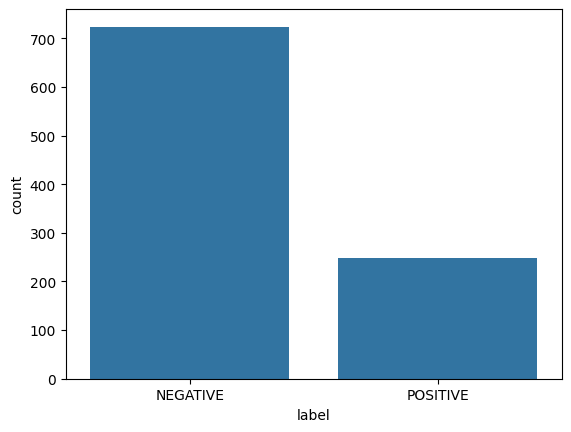

In [21]:
sns.countplot(data = df, x = 'label');

In [22]:
neg_df = df[df['label'] == 'NEGATIVE']

In [24]:
import nltk
from nltk import word_tokenize
from nltk.probability import FreqDist
from wordcloud import WordCloud
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
all_reviews = ' '.join(reviews_df['review'])

In [29]:
# tokenize
words = word_tokenize(all_reviews)

In [34]:
print('total number of words:',len(words))

total number of words: 166270


In [ ]:
# Remove punctuations
reviews_no_punc = [word.lower() for word in words if word.isalpha()]
print('word count without punctuation',len(reviews_no_punc))

# frequency of words
word_dist = FreqDist(reviews_no_punc)
word_dist.plot(10)
#

In [39]:
# remove stop words

nltk.download('stopwords')
from nltk.corpus import stopwords

stopwords_list = stopwords.words('english')
print(stopwords_list)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


length of words without punctuation and stopwords: 74320


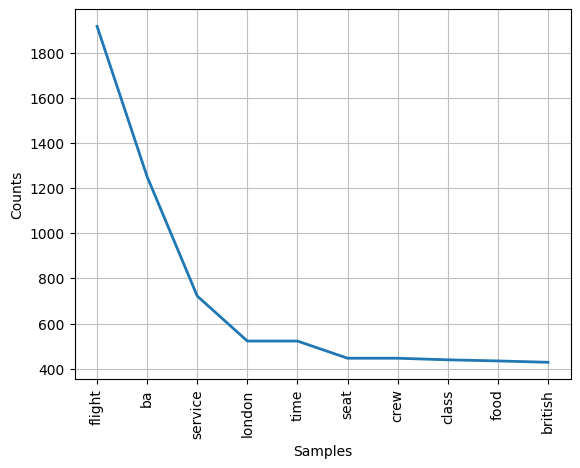

In [42]:
clean_words = [word for word in reviews_no_punc if word not in stopwords_list]
print('length of words without punctuation and stopwords:', len(clean_words))

clean_words_dist = FreqDist(clean_words)
clean_words_dist.plot(10);

length of words without punctuation and stopwords: 72118


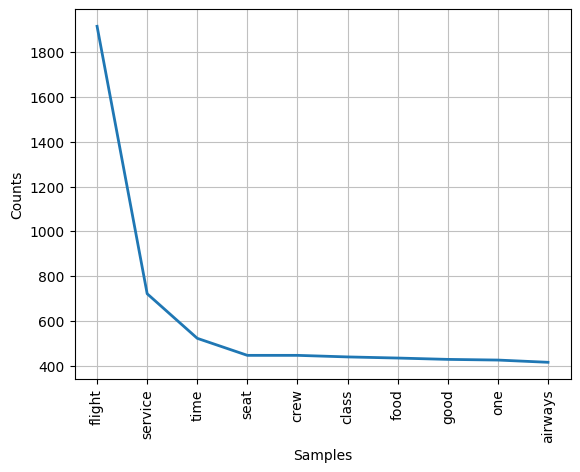

In [53]:
stopwords_list.extend(['ba','london','british'])
clean_words = [word for word in reviews_no_punc if word not in stopwords_list]
print('length of words without punctuation and stopwords:', len(clean_words))

clean_words_dist = FreqDist(clean_words)
clean_words_dist.plot(10);

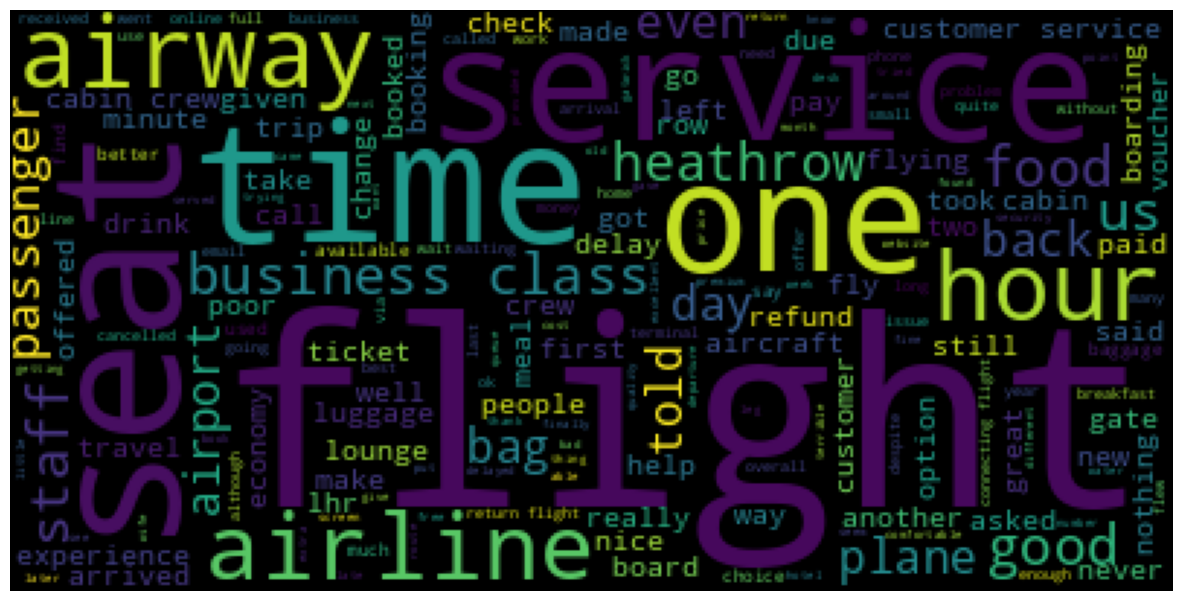

In [54]:
# word cloud
clean_words_string  = ' '.join(clean_words)

# generate the wordcloud
wordcloud = WordCloud(background_color='black').generate(clean_words_string)

# plot the wordcloud
plt.figure(figsize = [15,15])
plt.imshow(wordcloud)
plt.axis('off')
plt.show()